<a href="https://colab.research.google.com/github/kaazima/Bank-Personal-Loan-Classification/blob/main/Linear%20Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Bank Personal Loan Classification

Universal bank is a small but growing bank. The majority of customers are liability, or deposit only customers, and the bank is interested in converting more of them into asset, or borrowing, customers. The bank has had past success with marketing campaigns to convert the liability customers to personal loan customers. With that success, the bank is interested in being more targeted with its efforts to ensure marketing dollars are spent on those most likely to convert. The bank would like a model to help it predict which new customers are likely to become personal loan customers to aid in this targeting.

## Business Question

Can we predict which new customers are most likely to say yes to a personal loan?

## Import Necessary packages

In [ ]:
import pandas as pd
from time import time
import math
from sklearn.model_selection import train_test_split, GridSearchCV
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, make_scorer
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


## Dataset Analysis

In [ ]:
bank_df = pd.read_csv('https://raw.githubusercontent.com/Nuthi-Sriram/Bank_Loan_Modelling/master/UniversalBank.csv')
bank_df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [ ]:
# Drop columns that are not significant
bank_df = bank_df.drop(['ID', 'ZIP Code'], axis=1)
bank_df.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,4,1.6,1,0,0,1,0,0,0
1,45,19,34,3,1.5,1,0,0,1,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0,0,1


In [ ]:
print('Shape:', bank_df.shape)

Shape: (5000, 12)


## Split dataset into train & test

In [ ]:
feature = bank_df['Income'].values
target = bank_df['CCAvg'].values

In [ ]:
# Split the data into trainx, testx, trainy, testy with test_size = 0.20 using sklearn
x_train, x_test, y_train, y_test = train_test_split(feature, target, random_state=5, test_size=0.20)
x_train = x_train.reshape(len(x_train),1)
x_test = x_test.reshape(len(x_test),1)

In [ ]:
# Print the shape of x_train, x_test, y_train, y_test
print('Shape of x_train :', x_train.shape)
print('Shape of x_test  :', x_test.shape)
print('Shape of y_train :', y_train.shape)
print('Shape of y_test  :', y_test.shape)

Shape of x_train : (4000, 1)
Shape of x_test  : (1000, 1)
Shape of y_train : (4000,)
Shape of y_test  : (1000,)


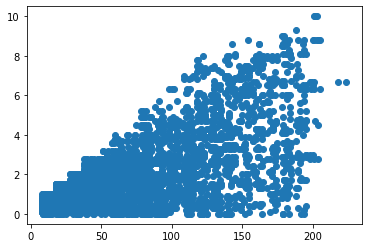

In [ ]:
# Data before splitting into train and test
plt.scatter(feature,target)
plt.show()

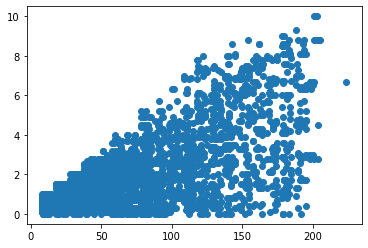

In [ ]:
# Training Data
plt.scatter(x_train,y_train)
plt.show()

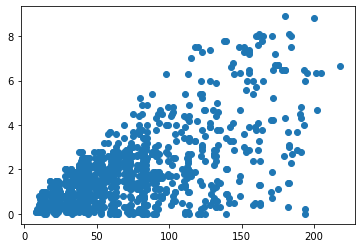

In [ ]:
# Testing Data
plt.scatter(x_test,y_test)
plt.show()

## Linear Regression

In [ ]:
# Create Linear Regression object
linear_regression = LinearRegression()

In [ ]:
t = time()
# Train the model
linear_regression.fit(x_train, y_train)
# Time is rounded to 3 decimal in seconds
print("Training time:", round(time()-t, 3), "s")

Training time: 0.002 s


In [ ]:
# Predict train data set
pred_train = linear_regression.predict(x_train)
# Predict test data set
pred_test = linear_regression.predict(x_test)

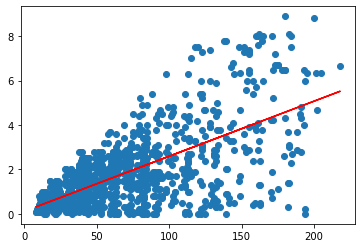

In [ ]:
plt.scatter(x_test,y_test)
plt.plot(x_test, pred_test, color='red')
plt.show()

#### Performance of our model

In [ ]:
# list the default parameters of the model
linear_regression.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': False}

In [ ]:
# Error on train data
math.sqrt(mean_squared_error(y_train,pred_train))

1.3314147955482944

In [ ]:
# Error on test data
math.sqrt(mean_squared_error(y_test,pred_test))

1.3444406758923768

## Hyper Parameter Tuning

In [ ]:
def scorer():
    return make_scorer(MSE, greater_is_better=False)
    
def MSE(y_test, pred_test):
    mse = math.sqrt(mean_squared_error(y_test, pred_test))
    print('MSE: %2.3f' % mse)
    return mse

In [ ]:
# List hyper parameters that we wish to tune
params = {'copy_X': [True, False], 'fit_intercept': [True, False], 'normalize': [True,False]}
# Use grid search
grid = GridSearchCV(linear_regression, verbose=1, param_grid=params, scoring=scorer(), cv=10, n_jobs=-1)

In [ ]:
# Train the model
grid.fit(x_train, y_train)
print()

Fitting 10 folds for each of 8 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:    1.2s finished


In [ ]:
print('Best Score:', grid.best_score_)
print('Best Parameters:', grid.best_params_)

Best Score: -1.3307389837928834
Best Parameters: {'copy_X': True, 'fit_intercept': True, 'normalize': True}


In [ ]:
best_linear_regression = grid.best_estimator_
# print best hyper parameters
print(best_linear_regression)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)


In [ ]:
t = time()
# Train the model
best_linear_regression.fit(x_train, y_train)
# Time is rounded to 3 decimal in seconds
print("Training time:", round(time()-t, 3), "s")

Training time: 0.003 s


In [ ]:
# Predict train data set
pred_train = best_linear_regression.predict(x_train)
# Predict test data set
pred_test = best_linear_regression.predict(x_test)

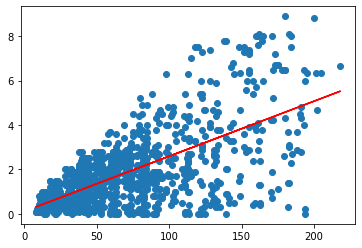

In [ ]:
plt.scatter(x_test,y_test)
plt.plot(x_test, pred_test, color='red')
plt.show()

#### Performance of our model

In [ ]:
# Error on train data
math.sqrt(mean_squared_error(y_train,pred_train))

1.3314147955482944

In [ ]:
# Error on test data
math.sqrt(mean_squared_error(y_test,pred_test))

1.3444406758923768

## Overall Analysis



*   No performance improvement after hyper parameter tuning. So we can consider the default parameters.

